In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data source:
[databank](https://databank.worldbank.org/reports.aspx?source=2&series=SL.UEM.TOTL.ZS&country=DEU#)

*Intro min wage Ireland 1 April 2000*

In [83]:
# Read the data

path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\minimun_wage_countries.xlsx'

df = pd.read_excel(path).drop(columns=['Series Name','Series Code'])

df.head()

,Country Name,Country Code,1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Germany,DEU,..,..,..,..,56.259,55.009,53.832,53.083,...,52.917,54.028,54.785,54.793,55.232,56.593,56.838,57.194,57.402,57.390
1,Austria,AUT,..,..,..,..,53.930,54.558,54.281,56.969,...,55.833,56.892,57.557,57.109,57.348,57.559,57.672,57.535,57.164,57.113
2,Denmark,DNK,..,..,..,..,61.657,61.960,60.148,59.204,...,63.359,63.213,62.685,60.263,58.579,58.151,57.450,56.887,57.015,57.469
3,Finland,FIN,..,..,..,..,59.302,54.893,51.363,50.575,...,56.273,57.006,57.525,55.449,54.822,55.198,55.111,54.256,53.821,53.381
4,Sweden,SWE,..,..,..,..,64.201,61.245,57.596,56.709,...,58.889,59.801,59.899,58.073,57.833,58.727,58.741,59.123,59.323,59.779


In [84]:
# Rename the columns;
# eg: 1987 [YR1987] --> 1987

df.rename(columns={'Country Name':'name', 'Country Code':'code'}, inplace=True)
df.rename(columns={old_c: new_c for old_c, new_c in zip(df.columns.to_list()[2:], range(1987, 2016))},
          inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    10 non-null     object 
 1   code    10 non-null     object 
 2   1987    10 non-null     object 
 3   1988    10 non-null     object 
 4   1989    10 non-null     object 
 5   1990    10 non-null     object 
 6   1991    10 non-null     float64
 7   1992    10 non-null     float64
 8   1993    10 non-null     float64
 9   1994    10 non-null     float64
 10  1995    10 non-null     float64
 11  1996    10 non-null     float64
 12  1997    10 non-null     float64
 13  1998    10 non-null     float64
 14  1999    10 non-null     float64
 15  2000    10 non-null     float64
 16  2001    10 non-null     float64
 17  2002    10 non-null     float64
 18  2003    10 non-null     float64
 19  2004    10 non-null     float64
 20  2005    10 non-null     float64
 21  2006    10 non-null     float64
 22  2007 

In [85]:
# Drop the columns with all missing data

df.drop(columns=[1987,1988,1989,1990], inplace=True)
df.head()

,name,code,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Germany,DEU,56.259,55.009,53.832,53.083,53.001,52.529,51.984,52.033,...,52.917,54.028,54.785,54.793,55.232,56.593,56.838,57.194,57.402,57.390
1,Austria,AUT,53.930,54.558,54.281,56.969,56.845,55.724,55.430,55.601,...,55.833,56.892,57.557,57.109,57.348,57.559,57.672,57.535,57.164,57.113
2,Denmark,DNK,61.657,61.960,60.148,59.204,60.094,60.740,61.906,61.895,...,63.359,63.213,62.685,60.263,58.579,58.151,57.450,56.887,57.015,57.469
3,Finland,FIN,59.302,54.893,51.363,50.575,49.563,50.009,51.107,52.217,...,56.273,57.006,57.525,55.449,54.822,55.198,55.111,54.256,53.821,53.381
4,Sweden,SWE,64.201,61.245,57.596,56.709,57.540,56.957,56.200,56.522,...,58.889,59.801,59.899,58.073,57.833,58.727,58.741,59.123,59.323,59.779


## Feature engineering

Since the employment rate has an upper bound... and since different countries start at a different level... it's better to consider the yearly change of the employment rate.

In [86]:
# Make a copy in case something goes wrong
df2 = df.copy()

In [87]:
# Calculate the yearly change

try:
    df.drop(columns=1991, inplace=True)
except:
    pass

cols = df2.columns.to_list()[2:]
for idx in range(1,len(cols)):
    df[cols[idx]] = df2[cols[idx]] - df2[cols[idx-1]]

df.head()

,name,code,1992,1993,1994,1995,1996,1997,1998,1999,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Germany,DEU,-1.250,-1.177,-0.749,-0.082,-0.472,-0.545,0.049,0.706,...,1.023,1.111,0.757,0.008,0.439,1.361,0.245,0.356,0.208,-0.012
1,Austria,AUT,0.628,-0.277,2.688,-0.124,-1.121,-0.294,0.171,0.616,...,0.694,1.059,0.665,-0.448,0.239,0.211,0.113,-0.137,-0.371,-0.051
2,Denmark,DNK,0.303,-1.812,-0.944,0.890,0.646,1.166,-0.011,0.523,...,0.880,-0.146,-0.528,-2.422,-1.684,-0.428,-0.701,-0.563,0.128,0.454
3,Finland,FIN,-4.409,-3.530,-0.788,-1.012,0.446,1.098,1.110,1.520,...,0.638,0.733,0.519,-2.076,-0.627,0.376,-0.087,-0.855,-0.435,-0.440
4,Sweden,SWE,-2.956,-3.649,-0.887,0.831,-0.583,-0.757,0.322,1.310,...,0.717,0.912,0.098,-1.826,-0.240,0.894,0.014,0.382,0.200,0.456


In [88]:
# Transpose the data as required by Synthetic Control

df = (df.drop(columns='code')
    .T)
df = df.rename(columns=df.iloc[0]).drop('name')

df.head()

,Germany,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland,Ireland
1992,-1.25,0.628,0.303,-4.409,-2.956,-1.436,-0.763,-0.311,-0.455,-0.715
1993,-1.177,-0.277,-1.812,-3.53,-3.649,-0.873,-1.415,-0.196,-0.475,0.22
1994,-0.749,2.688,-0.944,-0.788,-0.887,-0.869,0.004,0.776,-0.925,1.131
1995,-0.082,-0.124,0.89,-1.012,0.831,-0.634,2.359,0.132,0.362,1.583
1996,-0.472,-1.121,0.646,0.446,-0.583,0.038,0.051,2.116,2.829,0.865


## Data exploration

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

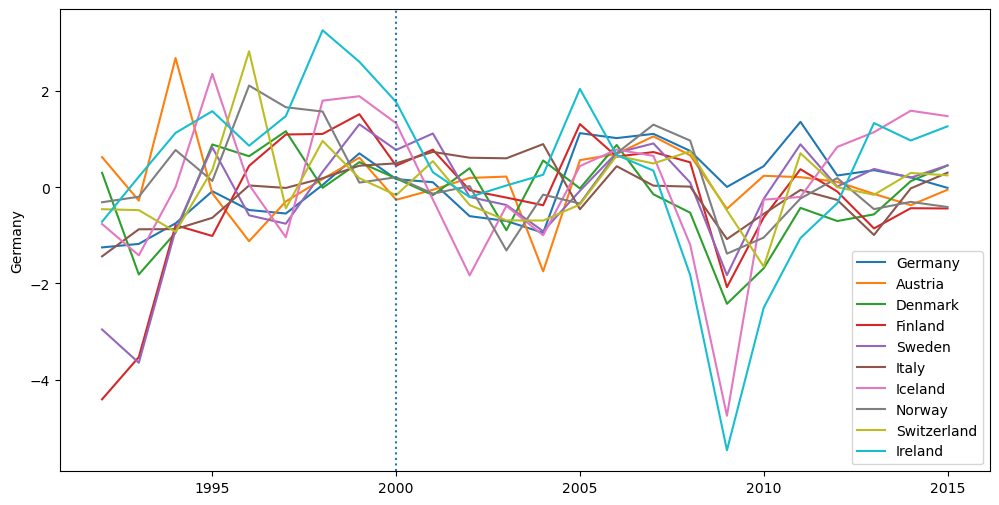

In [89]:
fig, ax = plt.subplots(figsize=(12,6))

for country in df.columns.tolist():
    sns.lineplot(data=df, x=df.index, y=country, label=country, ax=ax)

plt.axvline(x=2000, linestyle=':');

## Synthetic Control

In [90]:
df.head()

,Germany,Austria,Denmark,Finland,Sweden,Italy,Iceland,Norway,Switzerland,Ireland
1992,-1.25,0.628,0.303,-4.409,-2.956,-1.436,-0.763,-0.311,-0.455,-0.715
1993,-1.177,-0.277,-1.812,-3.53,-3.649,-0.873,-1.415,-0.196,-0.475,0.22
1994,-0.749,2.688,-0.944,-0.788,-0.887,-0.869,0.004,0.776,-0.925,1.131
1995,-0.082,-0.124,0.89,-1.012,0.831,-0.634,2.359,0.132,0.362,1.583
1996,-0.472,-1.121,0.646,0.446,-0.583,0.038,0.051,2.116,2.829,0.865


In [91]:
# Create the 4 dataframe for Synt. Control.
# pre-treatment, post-treatment, control, treated

y_co = df.drop(columns='Ireland')
y_tr = df['Ireland']

y_pre_co = y_co[y_co.index < 2000]
y_pre_tr = y_tr[y_tr.index < 2000]

y_post_co = y_co[y_co.index >= 2000]
y_post_tr = y_tr[y_tr.index >= 2000]

In [92]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(y_pre_co, y_pre_tr)

        # extract the weights
weights_lr = model.coef_
weights_lr.round(3)

array([-0.934, -0.188,  0.224,  2.436, -2.45 , -1.967,  1.993, -1.111,
       -0.043])

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

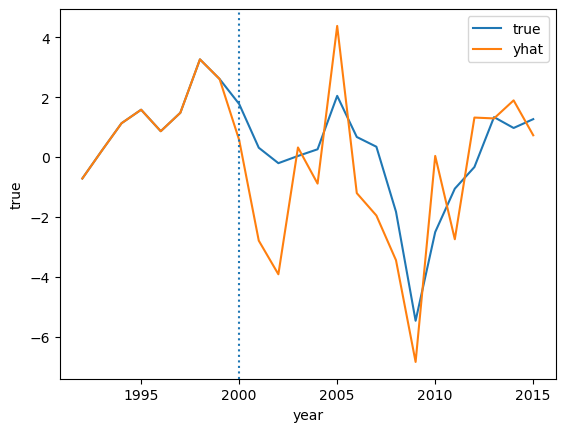

In [93]:
y0_hat = y_co.dot(weights_lr)
df_plot = pd.DataFrame({'year':y_co.index, 'true':y_tr, 'yhat':y0_hat})

fig, ax = plt.subplots()

for c in ['true','yhat']:
    sns.lineplot(data=df_plot, x='year', y=c, label=c, ax=ax)

plt.axvline(x=2000, linestyle=':');

In [94]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import (check_X_y, check_array,
                                               check_is_fitted)
import cvxpy as cp

class SyntheticControl(BaseEstimator, RegressorMixin):

    def __init__(self,):
        pass

    def fit(self, y_pre_co, y_pre_tr):

        y_pre_co, y_pre_tr = check_X_y(y_pre_co, y_pre_tr)
             
        w = cp.Variable(y_pre_co.shape[1])
                 
        objective = cp.Minimize(cp.sum_squares(y_pre_co@w - y_pre_tr))
        constraints = [cp.sum(w) == 1, w >= 0]
                 
        problem = cp.Problem(objective, constraints)
                 
        self.loss_ = problem.solve(verbose=False)
        self.w_ = w.value
                 
        self.is_fitted_ = True
        return self
                 
                 
    def predict(self, y_co):

        check_is_fitted(self)
        y_co = check_array(y_co)
                 
        return y_co @ self.w_

In [95]:
model = SyntheticControl()
model.fit(y_pre_co, y_pre_tr)

# extrac the weights
model.w_.round(3)

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.48, 0.52, 0.  ])

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

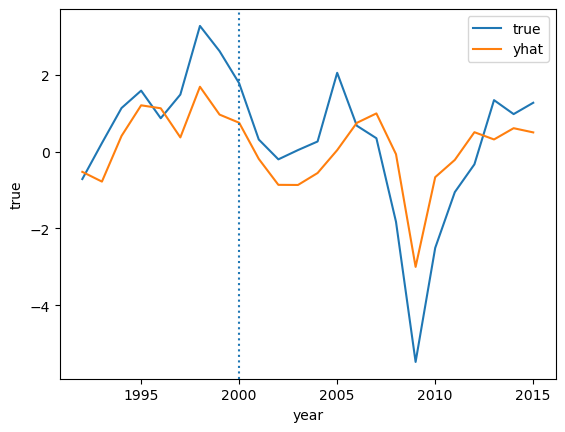

In [96]:
y0_hat = y_co.dot(model.w_)
df_plot = pd.DataFrame({'year':y_co.index, 'true':y_tr, 'yhat':y0_hat})

fig, ax = plt.subplots()

for c in ['true','yhat']:
    sns.lineplot(data=df_plot, x='year', y=c, label=c, ax=ax)

plt.axvline(x=2000, linestyle=':');

## Adding covariate to improve the model

### Understand the predictive power of X

In [97]:
# Read the data

path = r'C:\Users\matte\OneDrive\Desktop\GitHub\data\minimun w eff\gdp_by_country_eu.xlsx'

gdp = pd.read_excel(path)

gdp.head()

,Series Name,Series Code,Country Name,Country Code,1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,GDP (constant 2015 US$),NY.GDP.MKTP.KD,Germany,DEU,2.225205e+12,2.342139e+12,2.461782e+12,2.509124e+12,2.484613e+12,2.544043e+12,...,3.023170e+12,3.113153e+12,3.143036e+12,2.964077e+12,3.087972e+12,3.209180e+12,3.222611e+12,3.236713e+12,3.308229e+12,3.357586e+12
1,GDP (constant 2015 US$),NY.GDP.MKTP.KD,United Kingdom,GBR,1.754617e+12,1.767491e+12,1.747994e+12,1.755004e+12,1.798701e+12,1.867879e+12,...,2.659685e+12,2.729377e+12,2.723216e+12,2.597541e+12,2.655692e+12,2.686102e+12,2.726741e+12,2.775613e+12,2.864316e+12,2.927911e+12
2,GDP (constant 2015 US$),NY.GDP.MKTP.KD,Netherlands,NLD,4.464082e+11,4.650824e+11,4.764264e+11,4.845546e+11,4.906481e+11,5.051767e+11,...,7.125642e+11,7.394481e+11,7.554965e+11,7.277934e+11,7.375657e+11,7.490068e+11,7.412893e+11,7.403244e+11,7.508621e+11,7.655728e+11
3,GDP (constant 2015 US$),NY.GDP.MKTP.KD,Belgium,BEL,2.845294e+11,2.934562e+11,2.988355e+11,3.034096e+11,3.004912e+11,3.101880e+11,...,4.129290e+11,4.281119e+11,4.300252e+11,4.213355e+11,4.334038e+11,4.407479e+11,4.440060e+11,4.460450e+11,4.530860e+11,4.623356e+11
4,GDP (constant 2015 US$),NY.GDP.MKTP.KD,France,FRA,1.613902e+12,1.661091e+12,1.678502e+12,1.705347e+12,1.694626e+12,1.734592e+12,...,2.279283e+12,2.334550e+12,2.340502e+12,2.273252e+12,2.317568e+12,2.368385e+12,2.375801e+12,2.389493e+12,2.412341e+12,2.439189e+12


In [98]:
gdp = gdp.drop(columns=['Series Name', 'Series Code',
                        'Country Code'])

# Keep the same years as the previous dataframe
gdp = gdp[['Country Name']+[f'{i} [YR{i}]' for i in range(1989,2016)]]
gdp.rename(columns={'Country Name':'country'}, inplace=True)

gdp.head()

,country,1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],...,2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Germany,2.225205e+12,2.342139e+12,2.461782e+12,2.509124e+12,2.484613e+12,2.544043e+12,2.583326e+12,2.604143e+12,2.650814e+12,...,3.023170e+12,3.113153e+12,3.143036e+12,2.964077e+12,3.087972e+12,3.209180e+12,3.222611e+12,3.236713e+12,3.308229e+12,3.357586e+12
1,United Kingdom,1.754617e+12,1.767491e+12,1.747994e+12,1.755004e+12,1.798701e+12,1.867879e+12,1.915168e+12,1.964618e+12,2.061374e+12,...,2.659685e+12,2.729377e+12,2.723216e+12,2.597541e+12,2.655692e+12,2.686102e+12,2.726741e+12,2.775613e+12,2.864316e+12,2.927911e+12
2,Netherlands,4.464082e+11,4.650824e+11,4.764264e+11,4.845546e+11,4.906481e+11,5.051767e+11,5.209182e+11,5.391437e+11,5.624836e+11,...,7.125642e+11,7.394481e+11,7.554965e+11,7.277934e+11,7.375657e+11,7.490068e+11,7.412893e+11,7.403244e+11,7.508621e+11,7.655728e+11
3,Belgium,2.845294e+11,2.934562e+11,2.988355e+11,3.034096e+11,3.004912e+11,3.101880e+11,3.175852e+11,3.217819e+11,3.339892e+11,...,4.129290e+11,4.281119e+11,4.300252e+11,4.213355e+11,4.334038e+11,4.407479e+11,4.440060e+11,4.460450e+11,4.530860e+11,4.623356e+11
4,France,1.613902e+12,1.661091e+12,1.678502e+12,1.705347e+12,1.694626e+12,1.734592e+12,1.771134e+12,1.796160e+12,1.838123e+12,...,2.279283e+12,2.334550e+12,2.340502e+12,2.273252e+12,2.317568e+12,2.368385e+12,2.375801e+12,2.389493e+12,2.412341e+12,2.439189e+12


In [99]:
# Rename the columns
# eg: 1989 [YR1989] --> 1989

gdp = gdp.rename(columns={old_c: new_c for old_c, new_c
                          in zip(gdp.columns.to_list()[1:], range(1989, 2016))})

In [100]:
gdp.head()

,country,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Germany,2.225205e+12,2.342139e+12,2.461782e+12,2.509124e+12,2.484613e+12,2.544043e+12,2.583326e+12,2.604143e+12,2.650814e+12,...,3.023170e+12,3.113153e+12,3.143036e+12,2.964077e+12,3.087972e+12,3.209180e+12,3.222611e+12,3.236713e+12,3.308229e+12,3.357586e+12
1,United Kingdom,1.754617e+12,1.767491e+12,1.747994e+12,1.755004e+12,1.798701e+12,1.867879e+12,1.915168e+12,1.964618e+12,2.061374e+12,...,2.659685e+12,2.729377e+12,2.723216e+12,2.597541e+12,2.655692e+12,2.686102e+12,2.726741e+12,2.775613e+12,2.864316e+12,2.927911e+12
2,Netherlands,4.464082e+11,4.650824e+11,4.764264e+11,4.845546e+11,4.906481e+11,5.051767e+11,5.209182e+11,5.391437e+11,5.624836e+11,...,7.125642e+11,7.394481e+11,7.554965e+11,7.277934e+11,7.375657e+11,7.490068e+11,7.412893e+11,7.403244e+11,7.508621e+11,7.655728e+11
3,Belgium,2.845294e+11,2.934562e+11,2.988355e+11,3.034096e+11,3.004912e+11,3.101880e+11,3.175852e+11,3.217819e+11,3.339892e+11,...,4.129290e+11,4.281119e+11,4.300252e+11,4.213355e+11,4.334038e+11,4.407479e+11,4.440060e+11,4.460450e+11,4.530860e+11,4.623356e+11
4,France,1.613902e+12,1.661091e+12,1.678502e+12,1.705347e+12,1.694626e+12,1.734592e+12,1.771134e+12,1.796160e+12,1.838123e+12,...,2.279283e+12,2.334550e+12,2.340502e+12,2.273252e+12,2.317568e+12,2.368385e+12,2.375801e+12,2.389493e+12,2.412341e+12,2.439189e+12


In [101]:
# In case something goes wrong

gdp2 = gdp.copy()

In [102]:
# Calculate the yearly change

try:
    gdp.drop(columns=[1989,1990, 1991], inplace=True)
except:
    pass

cols = gdp2.columns.to_list()[3:]
for idx in range(1,len(cols)):
    gdp[cols[idx]] = gdp2[cols[idx]] - gdp2[cols[idx-1]]

gdp.head()

,country,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Germany,4.734195e+10,-2.451037e+10,5.942927e+10,3.928375e+10,2.081704e+10,4.667044e+10,5.338561e+10,5.103531e+10,8.024630e+10,...,1.111361e+11,8.998330e+10,2.988251e+10,-1.789593e+11,1.238949e+11,1.212088e+11,1.343034e+10,1.410186e+10,7.151657e+10,4.935651e+10
1,United Kingdom,7.010888e+09,4.369664e+10,6.917821e+10,4.728854e+10,4.945006e+10,9.675603e+10,7.038087e+10,6.536336e+10,9.488753e+10,...,6.198819e+10,6.969255e+10,-6.160941e+09,-1.256753e+11,5.815086e+10,3.041037e+10,4.063903e+10,4.887199e+10,8.870257e+10,6.359521e+10
2,Netherlands,8.128173e+09,6.093527e+09,1.452855e+10,1.574149e+10,1.822558e+10,2.333982e+10,2.623377e+10,2.963631e+10,2.594391e+10,...,2.383678e+10,2.688392e+10,1.604843e+10,-2.770318e+10,9.772368e+09,1.144104e+10,-7.717421e+09,-9.649755e+08,1.053774e+10,1.471066e+10
3,Belgium,4.574140e+09,-2.918416e+09,9.696765e+09,7.397230e+09,4.196733e+09,1.220730e+10,6.552228e+09,1.206451e+10,1.310523e+10,...,1.027709e+10,1.518291e+10,1.913355e+09,-8.689705e+09,1.206828e+10,7.344088e+09,3.258085e+09,2.039063e+09,7.040969e+09,9.249565e+09
4,France,2.684500e+10,-1.072094e+10,3.996621e+10,3.654143e+10,2.502601e+10,4.196362e+10,6.596399e+10,6.514595e+10,7.726620e+10,...,5.449233e+10,5.526661e+10,5.951841e+09,-6.724996e+10,4.431563e+10,5.081732e+10,7.416236e+09,1.369238e+10,2.284793e+10,2.684725e+10


In [103]:
# transpose the dataframe

gdp = gdp.T
gdp = gdp.rename(columns=gdp.iloc[0]).drop('country')
gdp.head()

,Germany,United Kingdom,Netherlands,Belgium,France,Finland
1992,47341949766.753906,7010887933.244141,8128172718.839478,4574139975.612488,26845000571.077637,-4836366690.234375
1993,-24510371313.214844,43696644344.245117,6093526899.266357,-2918416107.958618,-10720943464.861084,-939757418.359375
1994,59429271670.574219,69178207561.561768,14528545393.624207,9696765429.679749,39966206528.846191,5588616430.078125
1995,39283746259.335938,47288539904.868652,15741487075.913269,7397230064.547241,36541428708.838867,6182205826.5625
1996,20817035898.03125,49450064268.782471,18225583253.323853,4196732508.789062,25026008553.029785,5603040097.656281


In [104]:
# rename the new columns

new_cols = [f'{i}_gdp' for i in gdp.columns.to_list()]

gdp = gdp.rename(columns={old:new for old,new in zip(gdp.columns.to_list(), new_cols)})
gdp = gdp.rename(columns={'United Kingdom_gdp':'uk_gdp'})

In [105]:
# Check if they have the same shape()

[df.shape, gdp.shape]

[(24, 10), (24, 6)]

In [106]:
#Change datatypes to floats

gdp = gdp/1e11 # decrease the scale

for c in df.columns:
    df[c] = df[c].astype(float)

for c in gdp.columns:
    gdp[c] = gdp[c].astype(float)

try:
    gdp = gdp.drop([1989,1990])
except:
    pass

In [107]:
import statsmodels.formula.api as smf

c = 'uk_gdp'

df_reg = pd.merge(df[df.index >= 2000]['Ireland'], gdp[[c]], left_index=True, right_index=True)

result = smf.ols(f'Ireland ~ {c}', data=df_reg).fit()

result.summary().tables[1]

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-1.5861,0.332,-4.778,0.000,-2.298,-0.874
uk_gdp,3.1495,0.491,6.414,0.000,2.096,4.203


c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

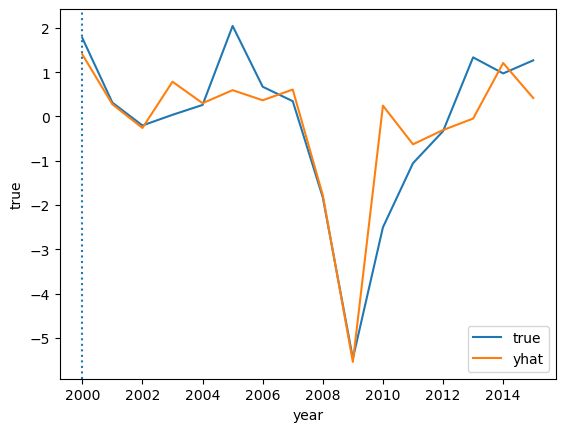

In [108]:
yhat = result.predict(df_reg[c])
df_plot = pd.DataFrame({'year':df_reg.index, 'true':df_reg['Ireland'],
                        'yhat':yhat})

fig, ax = plt.subplots()

for i in ['true', 'yhat']:
    sns.lineplot(data=df_plot, x='year', y=i, label=i, ax=ax)

plt.axvline(x=2000, linestyle=':');

### Implementing X

In [109]:
y_co = df.drop(columns='Ireland')
y_tr = df['Ireland']

y_pre_co = y_co[y_co.index < 2000]
y_pre_tr = y_tr[y_tr.index < 2000]

# c = the variable specified before: 'uk_gdp'
x_pre_co = gdp.loc[gdp.index < 2000, c]

y_post_co = y_co[y_co.index >= 2000]
y_post_tr = y_tr[y_tr.index >= 2000]
x_post_co = gdp.loc[gdp.index >= 2000, c]

In [114]:
def find_w_given_vs(vs, x_co_list, y_tr_pre):

    X_times_v = x_co_list[0] * vs[0]

    for year in x_co_list[0].index:
        X_times_v.loc[year, :] += x_co_list[1][year] * vs[1]

    model = SyntheticControl()
    model.fit(X_times_v, y_tr_pre)
    
    return {"loss": model.loss_, "w": model.w_} 

# When passing a weight of 0 for the new covariate,
# the result is the same as before, hence, it's a good sign
find_w_given_vs([0, 0.9],
                [y_pre_co, x_pre_co],
                y_pre_tr)

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


{'loss': 13.794767481233839,
 'w': array([0.11111111, 0.11111111, 0.11111111, 0.11111111, 0.11111111,
        0.11111111, 0.11111111, 0.11111111, 0.11111111])}

In [115]:
from scipy.optimize import minimize

def v_loss(vs):
    return find_w_given_vs(vs,
                        [y_pre_co, x_pre_co],
                        y_pre_tr).get("loss")

v_solution = minimize(v_loss, [0, 0], method='L-BFGS-B')
v_solution.x

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reduction

array([0.99678285, 2.28563701])

In [116]:
w_cov = find_w_given_vs(v_solution.x,
                                 [y_pre_co, x_pre_co],
                                 y_pre_tr)

w_cov

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


{'loss': 0.8526125906316382,
 'w': array([1.84970995e-09, 4.77299617e-02, 1.19321297e-10, 2.12959141e-10,
        1.00344972e-10, 4.66058826e-01, 4.86211205e-01, 3.16389535e-09,
        1.94083265e-09])}

In [117]:
vs = v_solution.x
x_co_list = [y_co, gdp[c]]

X_times_v = x_co_list[0] * vs[0]

for year in x_co_list[0].index:
    X_times_v.loc[year, :] += x_co_list[1][year] * vs[1]

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

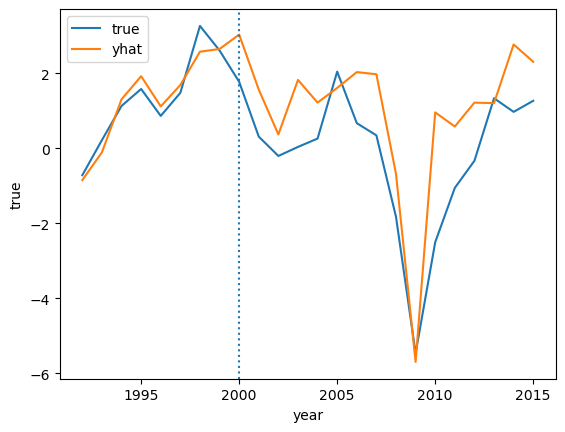

In [118]:
yhat = X_times_v.dot(w_cov['w'])
df_plot = pd.DataFrame({'year':yhat.index, 'true':df['Ireland'],
                        'yhat':yhat})

fig, ax = plt.subplots()

for i in ['true', 'yhat']:
    sns.lineplot(data=df_plot, x='year', y=i, label=i, ax=ax)

plt.axvline(x=2000, linestyle=':');

## Debiased Synthetic Control

In [119]:
def get_predictions(y_pre_co, x_pre_co, y_pre_tr):

    def v_loss(vs):
        return find_w_given_vs(vs,
                            [y_pre_co, x_pre_co],
                            y_pre_tr).get("loss")

    v_solution = minimize(v_loss, [0, 0], method='L-BFGS-B')
    w_cov = find_w_given_vs(v_solution.x,
                                    [y_pre_co, x_pre_co],
                                    y_pre_tr)

    vs = v_solution.x
    x_co_list = [y_co, gdp[c]]

    y_hat = x_co_list[0] * vs[0]

    for year in x_co_list[0].index:
        y_hat.loc[year, :] += x_co_list[1][year] * vs[1]
    
    return y_hat.dot(w_cov['w'])

In [120]:
def debiased_sc_atts(y_pre_co, y_pre_tr,
                    x_pre_co, x_post_co,
                    y_post_co, y_post_tr, K=3):
                 
    block_size = int(min(np.floor(len(y_pre_tr)/K), len(y_post_tr)))
    blocks = np.split(y_pre_tr.index[-K*block_size:], K)
             
    def fold_effect(hold_out):
        y_hat = get_predictions(y_pre_co.drop(hold_out),
                                x_pre_co.drop(hold_out),
                                y_pre_tr.drop(hold_out))
                 
        bias_hat = np.mean(y_pre_tr.loc[hold_out]
                            - y_hat)
                 
        y0_hat = model.predict(y_post_co)
        return (y_post_tr - y0_hat) - bias_hat
             
    return pd.DataFrame([fold_effect(block) for block in blocks]).T

In [121]:
deb_atts = debiased_sc_atts(y_pre_co,
                            y_pre_tr,
                            x_pre_co,
                            x_post_co,
                            y_post_co,
                            y_post_tr,
                            K=3)

deb_atts.head()

c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
c:\Users\matte\anaconda3\envs\py_env\Lib\site-packages\cvxpy\reduction

,Ireland,Ireland,Ireland
2000,1.789142,3.307650,0.164231
2001,1.267441,2.785949,-0.357470
2002,1.426065,2.944574,-0.198845
2003,1.670216,3.188725,0.045306
2004,1.582647,3.101156,-0.042263
